# Grade: /100

## Instructions

- Once the notebook is complete, restart your kernel and rerun your cells

- Submit this notebook to owl by the deadline

- You may use any python library functions you wish to complete the Lab assignment.

This notebook contains the questions for Assignment 1. Please note, a random seed has been set to ensure the reproducability of the results -- _DO NOT_ change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed as well**. Make sure to complete this assignment individually and appropriately reference all external code and documentation used.


## Data

In this Assignmnet you will use 2 separate datasets. Datasets are entitled according to the exam Questions (Dataset1 to be used in Question1, and Dataset2 to be used in Question2).

You need to download datasets from OWL in the `Assignments / Assignment1`.


### Preliminaries

Feel free to add any libraries to the Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.


In [4]:
## perform the necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import recall_score, make_scorer, mean_squared_error, confusion_matrix, roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Question 1 - Regression (70 pts)

### Dataset

In this question you need to download and use Dataset1.

Dataset1 lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:

- Age: Player age in years
- Nationality: Players nationality
- Overall: Player overall performance score (higher better)
- Potential: Player potential score (higher better)
- Club: Player home soccer club
- Value: Player value _i.e_, the amount of money a club should pay in order to purchase the player (higher better)
- Wage: Player stipend (higher better)
- Preferred Foot: Player preferred foot to play
- International Reputation: Player international fame (higher better)
- Week Foot: Performance score of player weak foot (higher better)
- Skill Moves: Player move skill score (higher better)
- Body Type: Player body type
- Position: Position player holds on the pitch
- Height: Player height in CM
- Weight: Player weight in kg


### Question 1.1 - Data loading (8 pts)

- Load `Dataset1.csv` as a pandas dataframe, and display its first 5 rows.
- Show the statistical summary of the data.
- How many missing values does dataset contain?
- Dummy code catecorical variables (drop the first).


In [794]:
import pandas as pd

In [8]:
dataset1 = pd.read_csv("Dataset1.csv")

In [9]:
dataset1.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,Portugal,86,87,Manchester United,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
1,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
2,31,Belgium,91,91,Manchester City,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
3,25,Italy,86,89,Inter,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68
4,27,Germany,89,90,FC Bayern München,105500000.0,130000.0,Right,4.0,4.0,3.0,Normal,Middle,177,75


In [10]:
dataset1.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,4903.000000,4903.000000,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,25.751581,69.188864,73.407098,5.931980e+06,15037.344483,1.210891,2.992046,2.514787,181.053437,75.154803
std,4.483194,7.005289,6.593820,1.271123e+07,29897.342606,0.572371,0.689830,0.804754,6.979453,7.048869
min,16.000000,47.000000,51.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,156.000000,49.000000
25%,22.000000,64.000000,69.000000,7.750000e+05,1000.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,25.000000,69.000000,73.000000,1.700000e+06,4000.000000,1.000000,3.000000,2.000000,181.000000,75.000000
75%,29.000000,74.000000,78.000000,4.500000e+06,16000.000000,1.000000,3.000000,3.000000,186.000000,80.000000
max,44.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,102.000000


In [798]:
missing_Data = dataset1.isnull()

In [799]:
Missing_Data

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4899,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4900,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4901,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [800]:
Missing_Data.sum().sum()

0

In [801]:
# Number of missing values is 0

In [802]:
Dataset1_encoded= pd.get_dummies(data = Dataset1, columns= (['Nationality','Club','Preferred Foot','Body Type','Position']),drop_first= True). astype(int)
Dataset1_encoded

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,...,Club_İstanbul Başakşehir FK,Club_İstanbulspor,Club_İttifak Holding Konyaspor,Club_ŁKS Łódź,Club_Śląsk Wrocław,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_Forward,Position_Middle
0,27,86,87,78500000,190000,3,3,4,179,69,...,0,0,0,0,0,1,0,1,0,1
1,30,85,85,46500000,46000,2,3,3,172,69,...,0,0,0,0,0,0,0,1,0,0
2,31,91,91,107500000,350000,4,5,4,181,70,...,0,0,0,0,0,1,0,1,0,1
3,25,86,89,89500000,110000,3,3,3,172,68,...,0,0,0,0,0,1,1,0,0,1
4,27,89,90,105500000,130000,4,4,3,177,75,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,27,59,61,210000,2000,1,3,1,193,86,...,0,0,0,0,0,0,0,1,0,0
4899,28,54,56,90000,500,1,2,1,177,75,...,0,0,0,0,0,1,0,0,0,0
4900,31,60,60,130000,1000,1,3,1,192,80,...,0,0,0,0,0,1,1,0,0,0
4901,20,58,69,375000,650,1,2,1,178,70,...,0,0,0,0,0,1,0,0,0,0


### Question 1.2 - Feature extraction (10 pts)

- Use `sns.jointplot` to plot the joint distribution between Weight and Height.
- The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height.


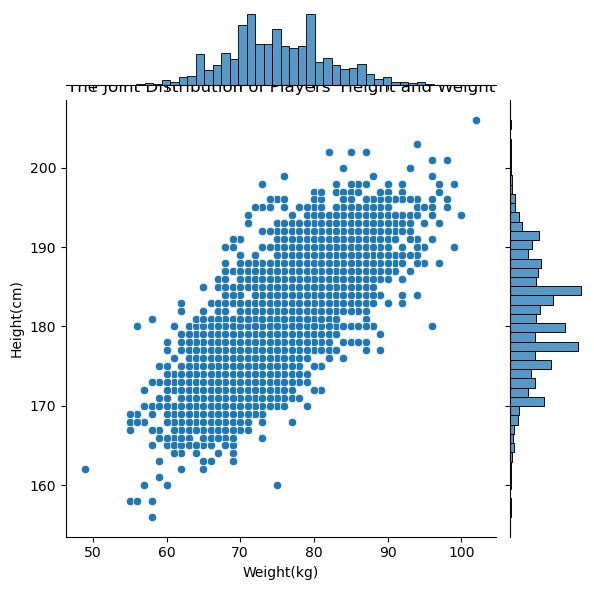

In [803]:
sns.jointplot(x='Weight',y='Height',data= Dataset1_encoded, kind='scatter')
plt.xlabel('Weight(kg)')
plt.ylabel('Height(cm)')
plt.title("The Joint Distribution of Players' Height and Weight")
plt.show()

In [804]:
# Feature extraction will be adding Body Mass Index based on Height and Weight and then dropping them as they will be unnecessary in our dataset. 
BMI= Dataset1_encoded['Weight']/((Dataset1_encoded['Height']/100) ** 2)
BMI= pd.Series(BMI,name= 'BMI')
BMI

0       21.534908
1       23.323418
2       21.366869
3       22.985398
4       23.939481
          ...    
4898    23.087868
4899    23.939481
4900    21.701389
4901    22.093170
4902    23.243802
Name: BMI, Length: 4903, dtype: float64

In [805]:
Dataset1_encoded.drop(['Height','Weight'],axis=1,inplace= True)

In [806]:
Dataset1_encoded

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Nationality_Albania,Nationality_Algeria,...,Club_İstanbul Başakşehir FK,Club_İstanbulspor,Club_İttifak Holding Konyaspor,Club_ŁKS Łódź,Club_Śląsk Wrocław,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_Forward,Position_Middle
0,27,86,87,78500000,190000,3,3,4,0,0,...,0,0,0,0,0,1,0,1,0,1
1,30,85,85,46500000,46000,2,3,3,0,0,...,0,0,0,0,0,0,0,1,0,0
2,31,91,91,107500000,350000,4,5,4,0,0,...,0,0,0,0,0,1,0,1,0,1
3,25,86,89,89500000,110000,3,3,3,0,0,...,0,0,0,0,0,1,1,0,0,1
4,27,89,90,105500000,130000,4,4,3,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,27,59,61,210000,2000,1,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4899,28,54,56,90000,500,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4900,31,60,60,130000,1000,1,3,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4901,20,58,69,375000,650,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [807]:
Dataset1_encoded_BMI =pd.concat([Dataset1_encoded, BMI],axis =1)

Dataset1_encoded_BMI

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Nationality_Albania,Nationality_Algeria,...,Club_İstanbulspor,Club_İttifak Holding Konyaspor,Club_ŁKS Łódź,Club_Śląsk Wrocław,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_Forward,Position_Middle,BMI
0,27,86,87,78500000,190000,3,3,4,0,0,...,0,0,0,0,1,0,1,0,1,21.534908
1,30,85,85,46500000,46000,2,3,3,0,0,...,0,0,0,0,0,0,1,0,0,23.323418
2,31,91,91,107500000,350000,4,5,4,0,0,...,0,0,0,0,1,0,1,0,1,21.366869
3,25,86,89,89500000,110000,3,3,3,0,0,...,0,0,0,0,1,1,0,0,1,22.985398
4,27,89,90,105500000,130000,4,4,3,0,0,...,0,0,0,0,1,1,0,0,1,23.939481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,27,59,61,210000,2000,1,3,1,0,0,...,0,0,0,0,0,0,1,0,0,23.087868
4899,28,54,56,90000,500,1,2,1,0,0,...,0,0,0,0,1,0,0,0,0,23.939481
4900,31,60,60,130000,1000,1,3,1,0,0,...,0,0,0,0,1,1,0,0,0,21.701389
4901,20,58,69,375000,650,1,2,1,0,0,...,0,0,0,0,1,0,0,0,0,22.093170


### Question 1.3 - Transformations (18 pts)

Use `sns.jointplot` to investigate the following relationships and apply Logarithm transformation and replace the feature with its transformation **where needed** (Drop the variables that has been transformed and keep the logarithm transformation of that variable instead):

Note: plot joint distributions **before** and **after** trasformation (if it's needed) to make sure the transformation fixes the problem.

- Value vs. Wage
- Value vs. Overall
- Value vs. Potential


In [808]:
print(Dataset1_encoded_BMI[['Wage','Overall','Potential','Value']])




        Wage  Overall  Potential      Value
0     190000       86         87   78500000
1      46000       85         85   46500000
2     350000       91         91  107500000
3     110000       86         89   89500000
4     130000       89         90  105500000
...      ...      ...        ...        ...
4898    2000       59         61     210000
4899     500       54         56      90000
4900    1000       60         60     130000
4901     650       58         69     375000
4902     500       50         73     130000

[4903 rows x 4 columns]


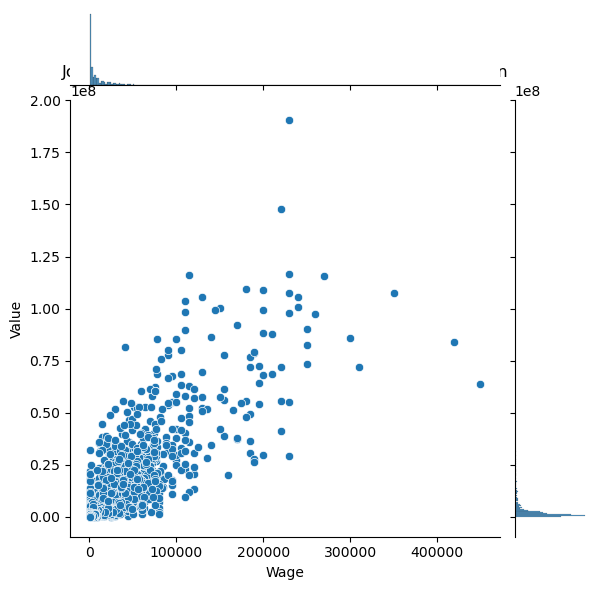

In [809]:

sns.jointplot(x='Wage',y='Value',data=Dataset1_encoded_BMI, kind='scatter')
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title("Joint distribution Wage & Value before transformation")
plt.show()


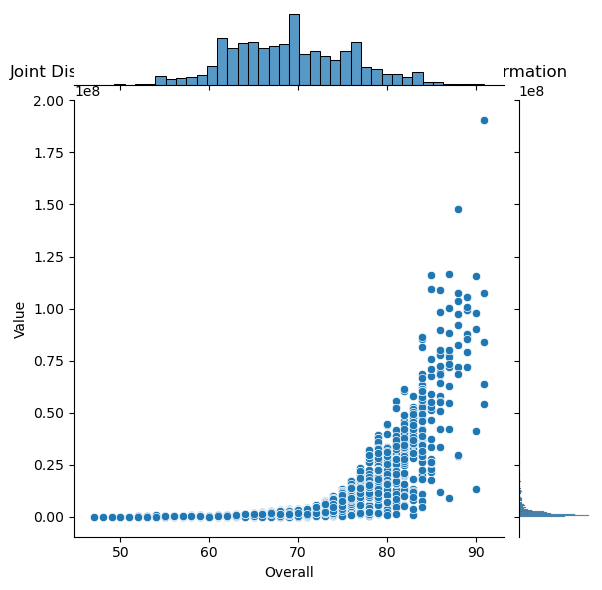

In [810]:
sns.jointplot(x='Overall',y='Value',data=Dataset1_encoded_BMI, kind='scatter')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Joint Distribution between Overall and Value before transformation')
plt.show()

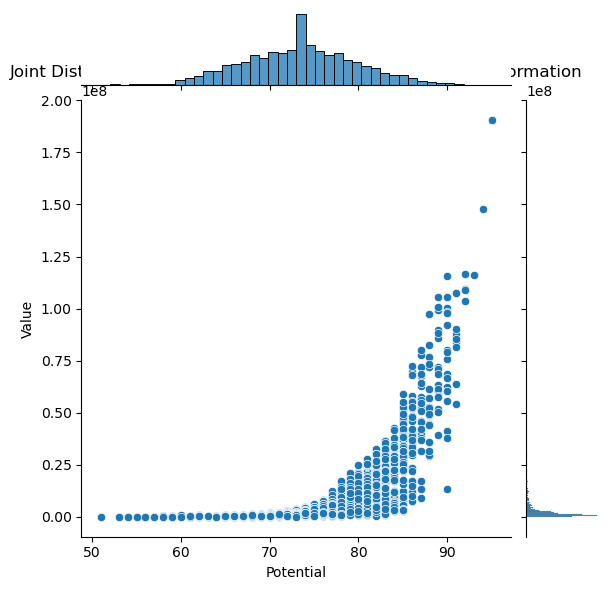

In [811]:
sns.jointplot(x='Potential',y='Value',data=Dataset1_encoded_BMI, kind='scatter')
plt.xlabel('Potential')
plt.ylabel('Value')
plt.title('Joint Distribution between potential and value before transformation')
plt.show()

OBSERVATION:


In [812]:
Dataset1_encoded_BMI['Wage']=np.log(Dataset1_encoded_BMI['Wage'])

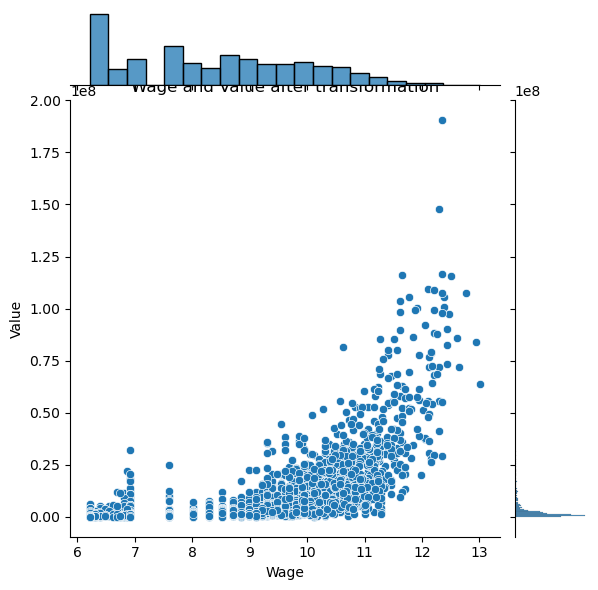

In [813]:
sns.jointplot(x='Wage',y='Value',data=Dataset1_encoded_BMI,kind='scatter')
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title('Wage and Value after transformation')
plt.show()

In [814]:
 Dataset1_encoded_BMI['Overall']=np.log(Dataset1_encoded_BMI['Overall'])

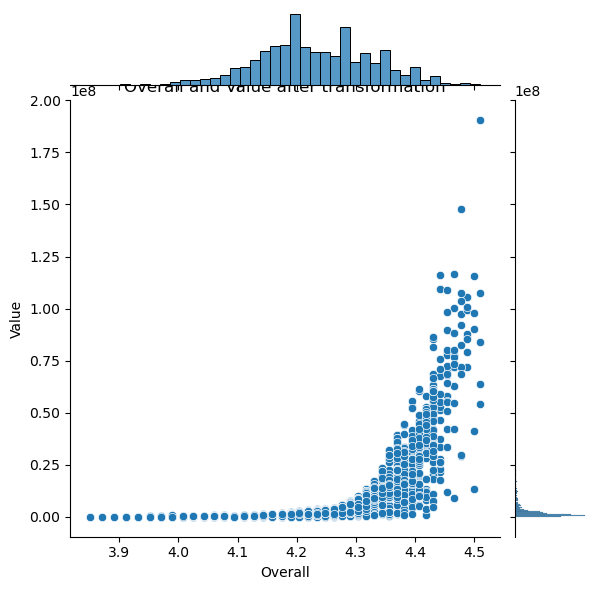

In [815]:
sns.jointplot(x='Overall',y='Value',data=Dataset1_encoded_BMI,kind='scatter')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Overall and Value after transformation')
plt.show()

In [816]:
Dataset1_encoded_BMI['Potential']=np.log(Dataset1_encoded_BMI['Potential'])

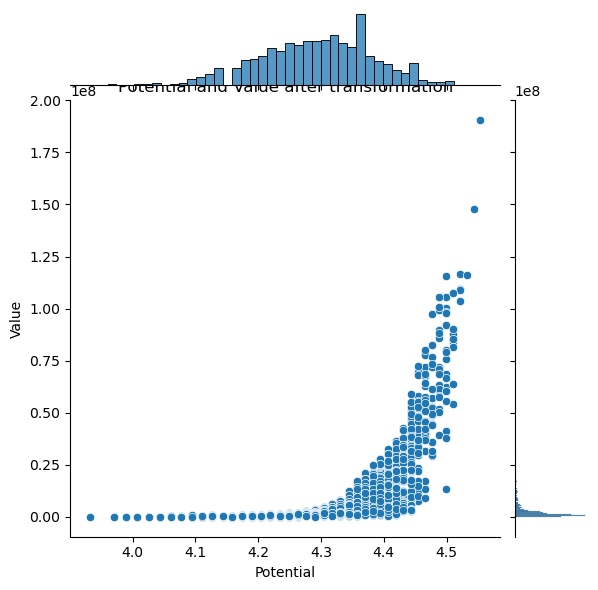

In [817]:
sns.jointplot(x='Potential',y='Value',data=Dataset1_encoded_BMI,kind='scatter')
plt.xlabel('Potential')
plt.ylabel('Value')
plt.title('Potential and Value after transformation')
plt.show()

After transforming the feature


In [818]:
print(Dataset1_encoded_BMI[['Wage','Overall','Potential','Value']])

           Wage   Overall  Potential      Value
0     12.154779  4.454347   4.465908   78500000
1     10.736397  4.442651   4.442651   46500000
2     12.765688  4.510860   4.510860  107500000
3     11.608236  4.454347   4.488636   89500000
4     11.775290  4.488636   4.499810  105500000
...         ...       ...        ...        ...
4898   7.600902  4.077537   4.110874     210000
4899   6.214608  3.988984   4.025352      90000
4900   6.907755  4.094345   4.094345     130000
4901   6.476972  4.060443   4.234107     375000
4902   6.214608  3.912023   4.290459     130000

[4903 rows x 4 columns]


Logging Value


In [819]:
Dataset1_encoded_BMI['Value']=np.log(Dataset1_encoded_BMI['Value'])

### Question 1.4 - Data split (8 pts)

- Split data to put aside 20% for testing purpose (with `random_state=1220`).

  _Note: keep the Value (or LogValue if you transformed it in Question 1.3) as the target variable, and use the remaining variables as features._

- Also define an RMSE scorer function.


In [820]:
x= Dataset1_encoded_BMI.drop(columns=['Value'])
x

,Age,Overall,Potential,Wage,International Reputation,Weak Foot,Skill Moves,Nationality_Albania,Nationality_Algeria,Nationality_Angola,...,Club_İstanbulspor,Club_İttifak Holding Konyaspor,Club_ŁKS Łódź,Club_Śląsk Wrocław,Preferred Foot_Right,Body Type_Normal,Body Type_Stocky,Position_Forward,Position_Middle,BMI
0,27,4.454347,4.465908,12.154779,3,3,4,0,0,0,...,0,0,0,0,1,0,1,0,1,21.534908
1,30,4.442651,4.442651,10.736397,2,3,3,0,0,0,...,0,0,0,0,0,0,1,0,0,23.323418
2,31,4.510860,4.510860,12.765688,4,5,4,0,0,0,...,0,0,0,0,1,0,1,0,1,21.366869
3,25,4.454347,4.488636,11.608236,3,3,3,0,0,0,...,0,0,0,0,1,1,0,0,1,22.985398
4,27,4.488636,4.499810,11.775290,4,4,3,0,0,0,...,0,0,0,0,1,1,0,0,1,23.939481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,27,4.077537,4.110874,7.600902,1,3,1,0,0,0,...,0,0,0,0,0,0,1,0,0,23.087868
4899,28,3.988984,4.025352,6.214608,1,2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,23.939481
4900,31,4.094345,4.094345,6.907755,1,3,1,0,0,0,...,0,0,0,0,1,1,0,0,0,21.701389
4901,20,4.060443,4.234107,6.476972,1,2,1,0,0,0,...,0,0,0,0,1,0,0,0,0,22.093170


In [821]:
y=Dataset1_encoded_BMI['Value']
y

0       18.178609
1       17.654963
2       18.493001
3       18.309749
4       18.474222
          ...    
4898    12.254863
4899    11.407565
4900    11.775290
4901    12.834681
4902    11.775290
Name: Value, Length: 4903, dtype: float64

In [7]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=1220)

NameError: name 'x' is not defined

In [823]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
rmse_score =make_scorer(rmse)

### Question 1.5 - Linear Regression (10 pts)

- Implement shuffled 5-split Kfold cross-validation on the sklearn's linear regression (with default arguments) and RMSE scorer function above and report the mean of cross validation score.
- Fit the model to the training set.
- Report prediction RMSE score.


In [824]:
kf= KFold(n_splits=5,shuffle=True, random_state=1220)

In [825]:
model= LinearRegression()

In [826]:
mean_cv_score= np.mean(cv_score)
mean_cv_score

0.17586736560148633

In [827]:
model.fit(x_train,y_train)

LinearRegression()

In [828]:
predicted_value= model.predict(x_test)

In [829]:
prediction_rmse=rmse(y_test,predicted_value)
print(prediction_rmse)

0.29753866924772165


### Question 1.6 - Dimensionality Reduction (14 pts)

- Implement dimensionality reduction on the dataset using PCA (Principal Component Analysis), then reapply linear regression following the approach outlined in the previous question.
- Choose the number of components such that a significant portion of the variance is retained (e.g., 95% of the variance).
- Ensure to standardize your data (mean of 0 and variance of 1) before applying PCA since PCA is sensitive to the variances of the initial variables.


In [830]:
# First will start with normlization of our data using Standard Sacler normilization technique 
scaler= StandardScaler()

In [831]:
x_scaled =scaler.fit_transform(x)

To ensure we retain 95% from the components, we use the following:


In [832]:
pca=PCA(n_components=0.95,svd_solver='full')

In [833]:
x_scaled_pca= pca.fit_transform(x_scaled)

In [834]:
x_train_scaled,x_test_scaled,y_train,y_test= train_test_split(x_scaled_pca,y,test_size=0.2, random_state=1220)

Now we re apply linear regression after this re-processing steps:


In [835]:
model=LinearRegression()

In [836]:
model.fit(x_train_scaled,y_train)

LinearRegression()

Now, inorder to evaluate the performace after PCA, we will apply same previous scores and compare the difference in cross validation score and RMSE scoreas the following:


In [837]:
cv_score=cross_val_score(model,x_train_scaled,y_train,cv=5,scoring=rmse_score)

In [838]:
mean_cv_score= np.mean(cv_score)
print(mean_cv_score)

8681.367250617423


In [839]:
y_predict= model.predict(x_test_scaled)

calculating RSME on the test set


In [840]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("Prediction RMSE Score:", test_rmse)

Prediction RMSE Score: 5.767106983931578


### Question 1.7 - Comparison (2 pts)

**Written question:** Based on the observed outcomes of questions 1.5 and 1.6, is there a distinction between their results? If so, what rationale can be provided for these differences?


Based on the above results, we can see that initially RMSE score was at : 0.2975 which means that the performance of the model is acceptable. However, when we try to apply PCA to see if we can further enhance the peroformance of the model we get the following RMSE score : 5.76710698. Although PCS should enhance the performance of the model as a function for dimensionality reduction ,we notice that it made the model perfom worse that before. This can be due to insuffecient capturing of information from the orginal data which eventually made the performace of the model worsend. PCA is a great tool but we need to


## Question 2: Clustering (30 pts)

### Dataset

In this question you need to download and use Dataset2.

This dataset is a modified dataset from UCI Machine Learning Datasets. The data contains selling feature on a social media platform. Each record has information about the time the information is posted and engagements in the data (such as emotion).


### Question 2.1 Data load and normalization (12 pts)

- Load the Dataset.

- How many observations and attributes do you have in Data set?

- Check for missing values and drop the columns that contain missing values, and ID column.

- Create a label encoder using "LabelEncoder" from scikit learn and convert categorical label (`data_type`) into integers.

- Then train a `MinMaxScaler` method over your full dataset. (**Note**: save a sample of `data_type` column before normalization for further use as the label later in Question 2.3).


In [926]:
dataset_2=pd.read_csv('Dataset2.csv')

In [927]:
dataset_2.shape

(7050, 12)

The above shows that the number of observations is 7050, and the number of columns is 12 columns


In [928]:
missing_data= dataset_2.isnull().sum()
missing_data

ID                0
data_type         0
data_published    4
num_reactions     0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
dtype: int64

In [929]:
dataset_2=dataset_2.dropna(axis=1)
dataset_2.shape

(7050, 11)

In [930]:
dataset_2

,ID,data_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,529,512,262,432,92,3,1,1,0
1,2,photo,150,0,0,150,0,0,0,0,0
2,3,video,227,236,57,204,21,1,1,0,0
3,4,photo,111,0,0,111,0,0,0,0,0
4,5,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,89,0,0,89,0,0,0,0,0
7046,7047,photo,16,0,0,14,1,0,1,0,0
7047,7048,photo,2,0,0,1,1,0,0,0,0
7048,7049,photo,351,12,22,349,2,0,0,0,0


In [931]:
dataset_2=dataset_2.drop('ID',axis=1)

now we need to find encode data_type using LabelEncoder from sklearn library


In [932]:
label_encoder= LabelEncoder()

In [933]:
dataset_2['data_type_encoded']=label_encoder.fit_transform(dataset_2['data_type'])

In [934]:
dataset_2

,data_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,data_type_encoded
0,video,529,512,262,432,92,3,1,1,0,3
1,photo,150,0,0,150,0,0,0,0,0,1
2,video,227,236,57,204,21,1,1,0,0,3
3,photo,111,0,0,111,0,0,0,0,0,1
4,photo,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,1
7046,photo,16,0,0,14,1,0,1,0,0,1
7047,photo,2,0,0,1,1,0,0,0,0,1
7048,photo,351,12,22,349,2,0,0,0,0,1


In [935]:
sample_of_data_type=dataset_2['data_type_encoded']

In [936]:
dataset_2.drop(columns=['data_type'],inplace= True)

In [937]:
dataset_2

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,data_type_encoded
0,529,512,262,432,92,3,1,1,0,3
1,150,0,0,150,0,0,0,0,0,1
2,227,236,57,204,21,1,1,0,0,3
3,111,0,0,111,0,0,0,0,0,1
4,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,1
7046,16,0,0,14,1,0,1,0,0,1
7047,2,0,0,1,1,0,0,0,0,1
7048,351,12,22,349,2,0,0,0,0,1


In [938]:
sacler=MinMaxScaler()

In [939]:
dataset_2_scaled = scaler.fit_transform(dataset_2)

- **Written question:** Explain why it is a good idea to normalize the data for a K-Means clustering process.


**Your written answer here **


### Question 2.2 K-Means Clustering - Silhouette (10 pts)

- Use K-means to cluster data. Run a silhouette analysis over the data to answer these question. Create a silhouette plot for 2, 3, and 4 clusters and calculate the corresponding silhouette scores. Use a random seed of 20211231 for your cluster functions.


In [940]:
k_values = [2,3,4]
for k in k_values:
    Kmeans=KMeans(n_clusters=k, random_state=20211231)
    

In [941]:
Kmeans.fit(dataset_2_scaled)

/Users/asmabashir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=20211231)

In [942]:
silhouette_scores = []
for k in k_values:
    Kmeans = KMeans(n_clusters=k, random_state=20211231)
    cluster_labels = Kmeans.fit_predict(dataset_2_scaled)
    silhouette_avg = silhouette_score(dataset_2_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette score for {k} clusters: {silhouette_avg}")

/Users/asmabashir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 2 clusters: 0.7524998608048084


/Users/asmabashir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 3 clusters: 0.6594452034644783


/Users/asmabashir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 4 clusters: 0.5758123388922184


/Users/asmabashir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, the average silhouette_score is : 0.7524998608048084


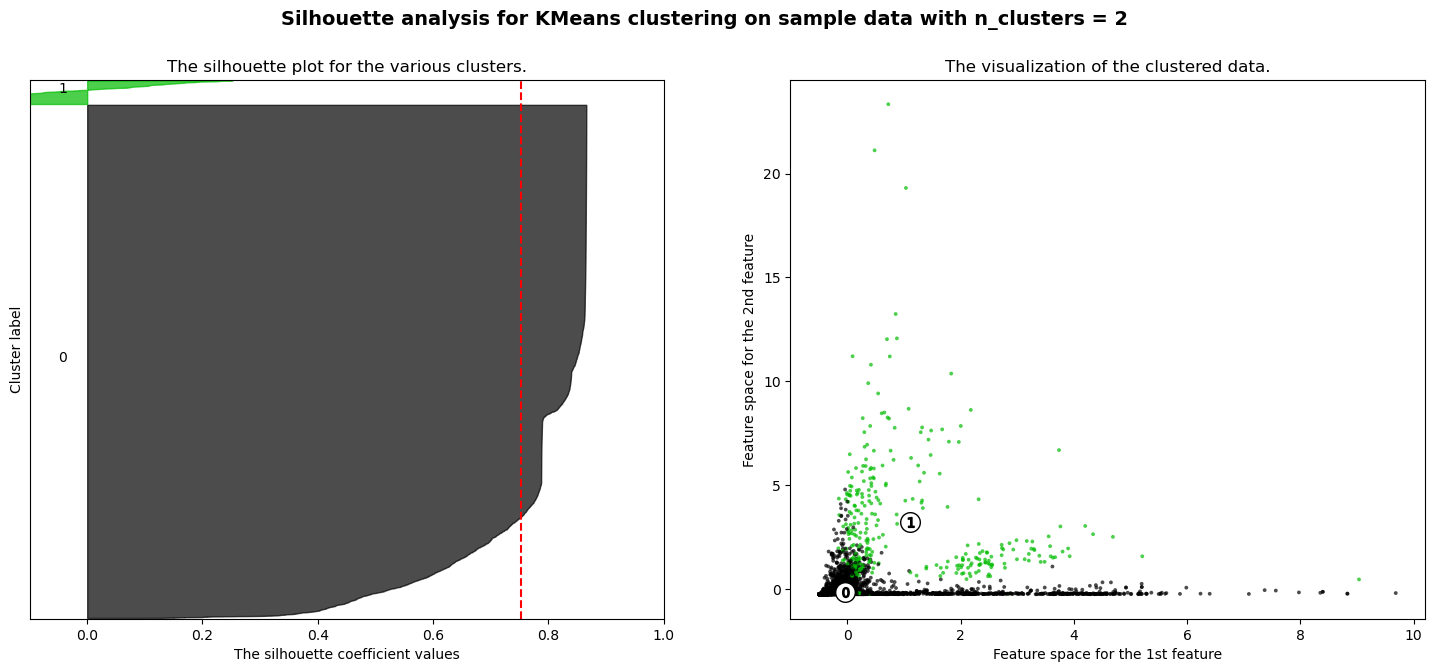

/Users/asmabashir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3, the average silhouette_score is : 0.6594452034644783


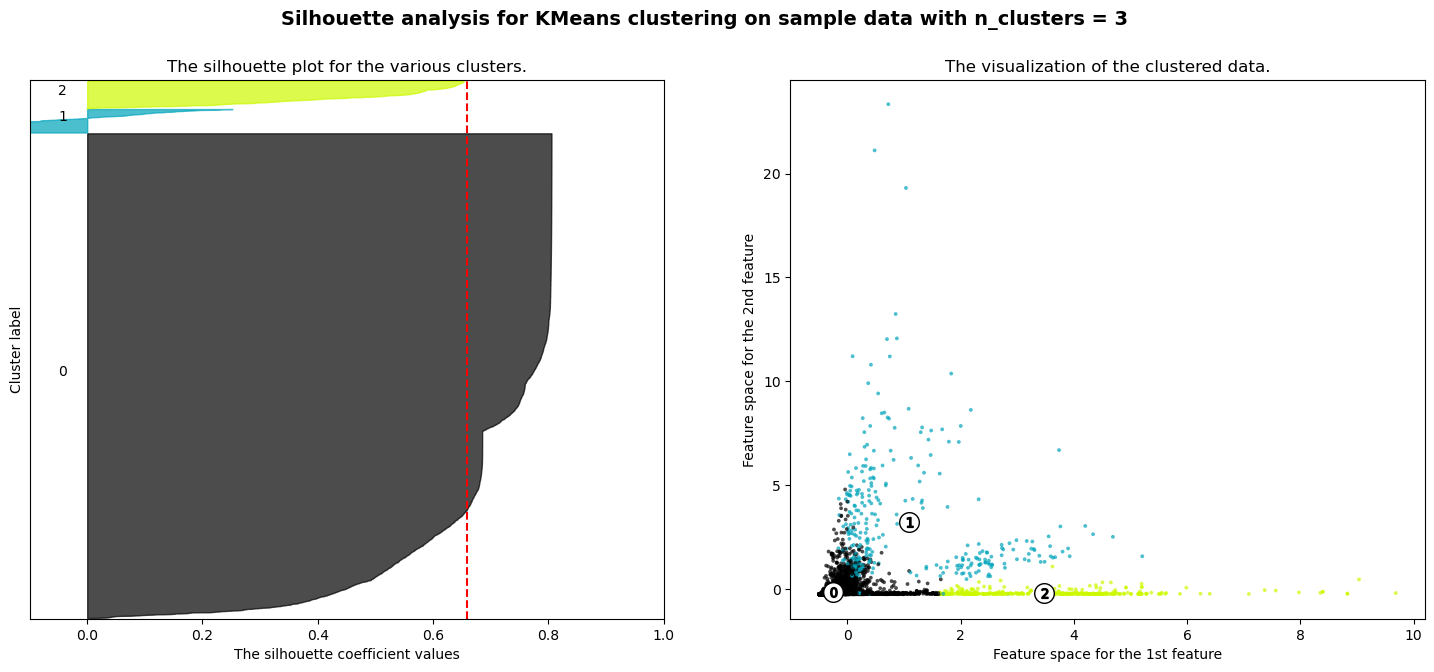

/Users/asmabashir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, the average silhouette_score is : 0.5758123388922184


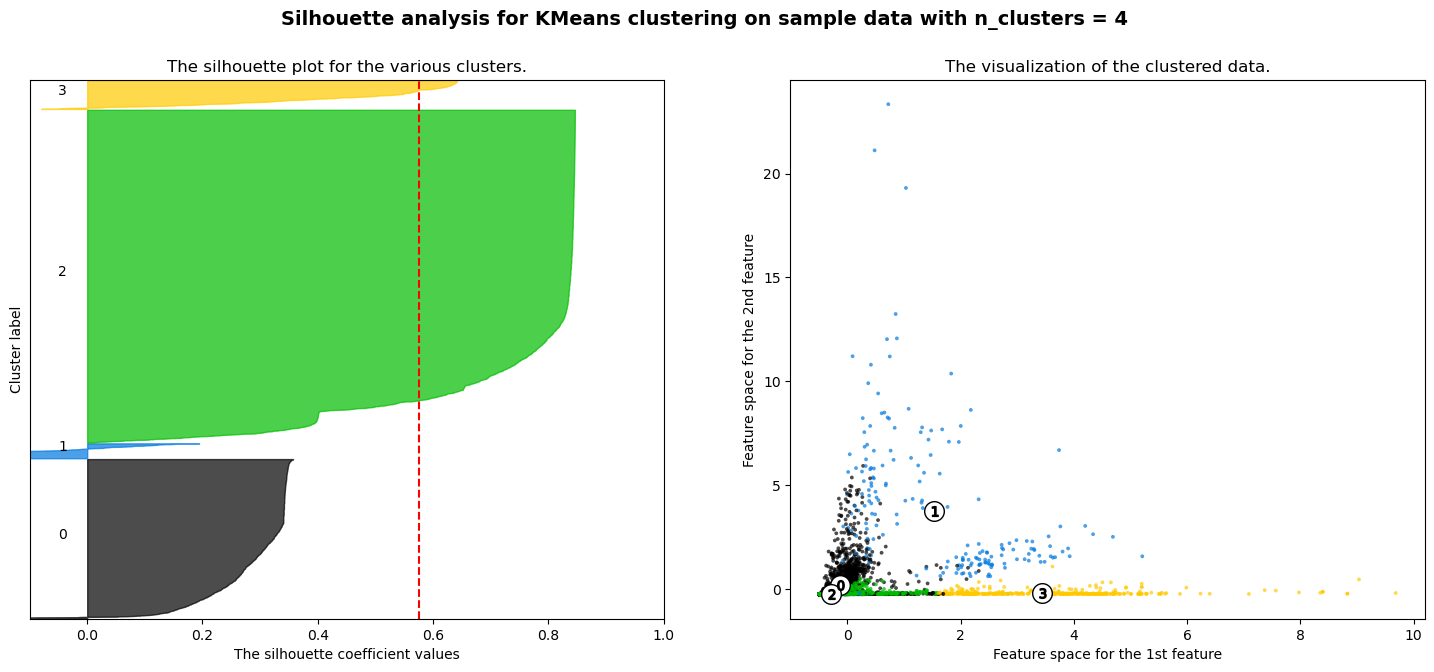

In [943]:
range_n_clusters = [2, 3, 4]

# Loop through each number of clusters
for n_clusters in range_n_clusters:
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Set the limits for silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dataset_2_scaled) + (n_clusters + 1) * 10])

    # Initialize KMeans clustering with the specified number of clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=20211231)
    cluster_labels = clusterer.fit_predict(dataset_2_scaled)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(dataset_2_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Calculate silhouette values for each sample
    sample_silhouette_values = silhouette_samples(dataset_2_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        # Set the color for the cluster
        color = cm.nipy_spectral(float(i) / n_clusters)

        # Fill silhouette plot
        ax1.fill_betweenx(np.arange(y_lower, y_lower + len(ith_cluster_silhouette_values)), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the cluster plots with their cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_values), str(i))

        # Compute new y_lower for the next plot
        y_lower = y_lower + len(ith_cluster_silhouette_values) + 10  # 10 for the 0 samples

    # Set the title, labels, and vertical line for silhouette plot
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels / ticks

    # Plot the clustered data
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(dataset_2_scaled[:, 0], dataset_2_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Plot cluster centers
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    # Annotate cluster centers with cluster numbers
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    # Set the title and labels for clustered data plot
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    # Set the common title for the figure
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Show the plot
    plt.show()

- **Written question:** How many clusters would you say the silhouette analysis show are in the data? Why?\*\*


**Your written answer here **


### Question 2.3 K-Means Clustering - Elbow (8 pts)

- Use elbow method to find optimal number of clusters for up to 10 clusters.
- Compare the models accuracy for the best three number of clusters (Hint: use "kmeans.fit").


In [960]:
inertia = []

In [961]:
clusters_range = range(1, 19)

In [962]:
for k in clusters_range:
    Kmeans = KMeans(n_clusters=k, random_state=20211231)
    Kmeans.fit(dataset_2_scaled)
    inertia.append(Kmeans.inertia_)

/Users/asmabashir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/asmabashir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/asmabashir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/asmabashir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

In [963]:
inertia

[70499.99999999997,
 54852.32504547892,
 44932.606262315334,
 37977.049126586986,
 32551.753317149512,
 28728.11170539108,
 25553.322562173198,
 22819.050044292417,
 19881.02273442164,
 18283.34201962034,
 17033.82241153711,
 16033.379019775046,
 15334.343731793939,
 14288.244450405382,
 14058.68200764976,
 13132.805797858759,
 12477.209401607535,
 11790.186425193973]

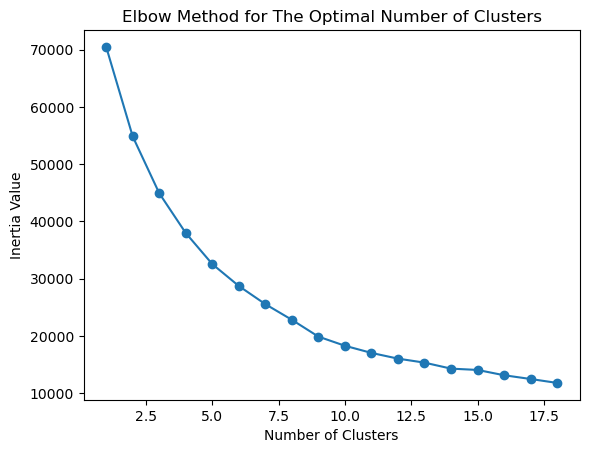

In [964]:
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Method for The Optimal Number of Clusters')
plt.show()

- **Written question:** Explain your final decision.


**Your written answer here **
